# **Exercise 3**
Create a neural network using the breast cancer dataset

# 1. Import the dataset

In [210]:
import tensorflow as tf
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from keras.utils import to_categorical

In [211]:
print(tf.__version__)

2.18.0


# 2. Build the neural network

In [212]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [213]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [214]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [215]:
# Convert target variables to categorical using to_categorical
# Assuming you have 2 classes (0 and 1) in your target data
y_train = to_categorical(y_train, num_classes=2)  # Specify num_classes
y_test = to_categorical(y_test, num_classes=2)    # Specify num_classes

In [548]:
from tensorflow.keras.callbacks import EarlyStopping

# Initialize the constructor
model = tf.keras.Sequential()

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [549]:
# Train the model
history = (model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, callbacks=[early_stop], validation_split=0.2))

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6081 - loss: 0.7993 - val_accuracy: 0.6395 - val_loss: 0.6699
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6272 - loss: 0.6010 - val_accuracy: 0.6395 - val_loss: 0.5388
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6690 - loss: 0.4721 - val_accuracy: 0.6628 - val_loss: 0.4563
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6776 - loss: 0.4463 - val_accuracy: 0.6860 - val_loss: 0.4018
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7366 - loss: 0.4063 - val_accuracy: 0.7791 - val_loss: 0.3628
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7876 - loss: 0.3787 - val_accuracy: 0.8488 - val_loss: 0.3345
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8524 - loss: 0.3672 - val_accuracy: 0.9070 - val_loss: 0.3095
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8656 - loss: 0.3457 - val_accuracy: 0.9070 - 

In [550]:
print(len(model.layers))
print(len(model.inputs))
print(len(model.outputs))

3
1
1


In [551]:
model.summary()

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_167 (Dense)               │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_168 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,952 (7.63 KB)

 Trainable params: 650 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,302 (5.09 KB)

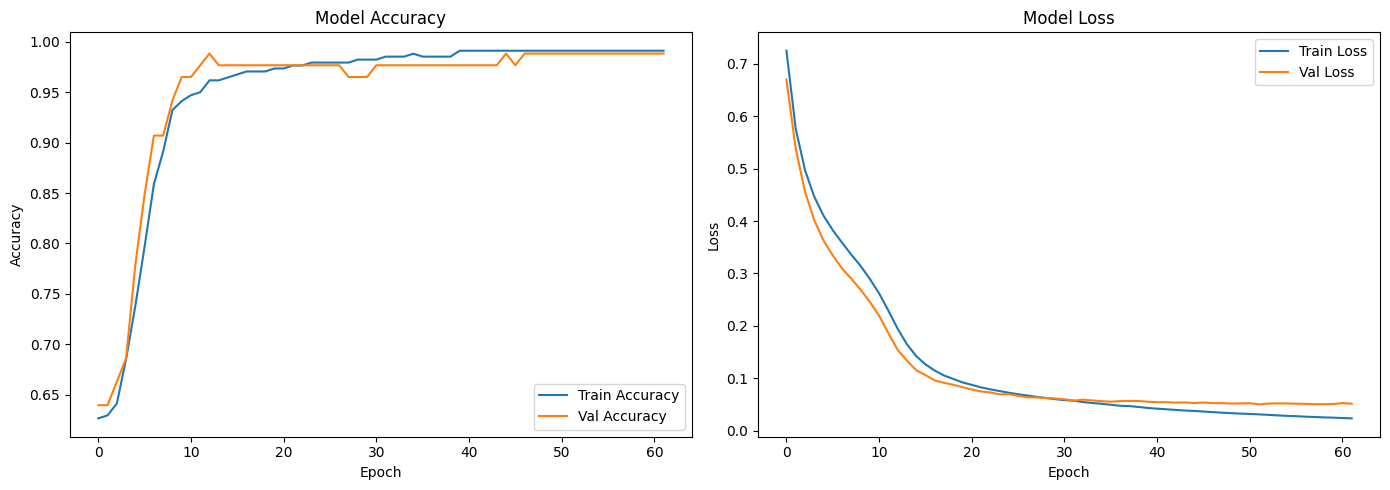

In [552]:
import matplotlib.pyplot as plt

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [553]:
model.get_config()

{'name': 'sequential_45',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 30),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_44'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_167',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 16,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_

In [554]:
print(X_train.shape)

(426, 30)


In [555]:
y_train.shape

(426, 2)

In [556]:
import numpy as np
y_pred = np.round(model.predict(X_test))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [557]:
y_pred[0:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [558]:
model.evaluate(X_test,  y_test, verbose=2)

5/5 - 0s - 75ms/step - accuracy: 0.9930 - loss: 0.0508


[0.050765857100486755, 0.9930070042610168]

In [559]:
model.save('breast_cancer_model.keras')